In [15]:
import sys
from build_graph import Graph
import networkx as nx
import matplotlib.pyplot as plt
from numpy import log10
import pandas as pd
import numpy as np

In [117]:
usernames =  ["JustinTrudeau"]
G = Graph(usernames).G

100%|██████████| 14966/14966 [00:07<00:00, 2000.61it/s]
--- 796 tweets, 5511 retweeters, 14170 retweets ---


In [118]:
def centrality_per_topic(G, username=None):
    """
        Calculates the eigenvector centrality for a network G, and then takes the sums/averages the centrality of tweets grouped by topic. 
        Parameters
        ----------
        :param G: The networkx Graph to calculate centrality from

        :param username: `optional` if present only uses that user's tweets when calculating the mean.

        :param measure: `optional` Options are ('mean','sum','zscore'). Choooses how to represent the aggregate zscores
    """
    netx_graph = G.copy()
    # centrality = nx.eigenvector_centrality_numpy(netx_graph)
    centrality = nx.eigenvector_centrality_numpy(netx_graph)
    topic_centrality = dict((topic, []) for topic in range(7))
    for node in netx_graph.nodes():
        node_attributes = netx_graph.nodes[node]
        node_centrality = centrality[node]
        if "lda_cluster" in node_attributes:
            if username and username in netx_graph.neighbors(node) or username is None:
                topic = node_attributes["lda_cluster"]
                if topic in topic_centrality:
                    topic_centrality[topic].append(node_centrality)
                else:
                    topic_centrality[topic] = [node_centrality]
    return topic_centrality

In [119]:
centrality_dict = centrality_per_topic(G)
try:
    centrality_dict.pop(-1)
except:
    pass
# centrality_dict.pop(-1)

In [120]:
centrality_df = pd.DataFrame({ key:pd.Series(value) for key, value in centrality_dict.items() })
print(centrality_df.max(),centrality_df.min()) 
centrality_df.columns = ["Topic {}".format(i+1) for i in range(7)]
# centrality_df.columns = ["Topic {}".format(i+1) for i centrality_df.columns]
centrality_df.head()

0    0.034405
1    0.036021
2    0.036051
3    0.041083
4    0.041723
5    0.035908
6    0.027696
dtype: float64 0    0.016022
1    0.016466
2    0.016022
3    0.016022
4    0.016022
5    0.016022
6    0.016022
dtype: float64


,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7
0,0.021245,0.019439,0.016363,0.018231,0.018329,0.018235,0.016862
1,0.021966,0.021088,0.018684,0.018683,0.017803,0.017207,0.017990
2,0.022997,0.017464,0.017551,0.017833,0.017752,0.019619,0.022889
3,0.020803,0.020896,0.022033,0.019201,0.017862,0.027733,0.021311
4,0.028596,0.018438,0.024036,0.018161,0.025280,0.017773,0.021485


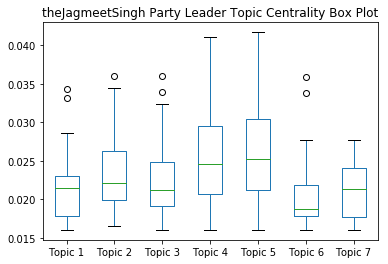

In [121]:
centrality_df.boxplot(grid=False)
plt.title("{} Party Leader Topic Centrality Box Plot".format(usernames[0]))
plt.savefig("../visualizations/centrality_charts/{}_box_plot.png".format(usernames))
plt.show()

In [122]:
# load packages
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
hvalue, pvalue = stats.kruskal(centrality_df["Topic 1"].dropna(),centrality_df["Topic 2"].dropna(),centrality_df["Topic 3"].dropna(),centrality_df["Topic 4"].dropna(),centrality_df["Topic 5"].dropna(),centrality_df["Topic 6"].dropna(),centrality_df["Topic 7"].dropna())
print(hvalue, pvalue)


66.55211345009256 2.078324694171634e-12
